In [1]:
import numpy as np
import pandas as pd
import csv
import copy
import os
import matplotlib.pyplot as plt
import itertools

In [2]:
def open_file(p_1, p_2, p_3, p_4, p_5):
    init_data = []
    total = {}
    path = [p_1, p_2, p_3, p_4, p_5]
    # print(path)
    for p in path:
        with open(p) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            target = ['0', '0', '0', '0', '0', '0']
            for row in csvReader:
                if (target[1] + target[2]) != (row[1] + row[2]):
                    r_int = int(row[1] + row[2])
                    t_int = int(target[1] + target[2])
                    if (r_int - t_int) != 1:
                        target = row
                        init_data.append(row)
            total[p] = init_data
            init_data = []
    return total

In [3]:
def deal_with(data_in):
    collect = {}
    for x in data_in:
        h = int(x[1]) + 8
        if h >= 24:
            h = h - 24
        time = str(h) + ":" + str(x[2]) + ":" + str(x[3])
        # print(time)
        collect[time] = int(x[0])
    return collect

In [4]:
def create_time_list():
    time = []
    h = []
    for x in range(0, 24):
        h.append(x)
    m = []
    for x in range(0, 60, 5):
        m.append(x)
    # print(h)
    # print(m)
    a = []
    for x in h:
        for y in m:
            a.append(x)
            a.append(y)
            time.append(a)
            a = []
    # print(time)
    return time

In [5]:
def find_end(time_end):
    time = {}
    num = 1
    for x in time_end:
        x = x.split(":")
        hour = int(x[0])
        minute = int(x[1])
        time[num] = [hour, minute]
        num  = num + 1
    h_s = 24
    m_s = 60
    for x in time.items():
        if h_s > x[1][0]:
            h_s = x[1][0]
            m_s = x[1][1]
        elif h_s == x[1][0]:
            if m_s > x[1][1]:
                h_s = x[1][0]
                m_s = x[1][1]
    # print(h_s, m_s)
    return str(h_s) + ":" + str(m_s)

In [6]:
def unite(dict_in):
    correct_dict = {}
    temp = copy.copy(time)
    for x in temp[:]:
        standard_hour = x[0]
        standard_minute = x[1]
        time_key = str(standard_hour) + ":" + str(standard_minute)
        for key in dict_in.copy().keys():
            key2 = key.split(":")
            if int(key2[0]) == standard_hour:
                if int(key2[1]) <= standard_minute:
                    # print("in", time_key, dict_in[key])
                    correct_dict[time_key] = dict_in[key]
                    del dict_in[key]
            elif int(key2[0]) < standard_hour:
                # print("in", time_key, dict_in[key])
                correct_dict[time_key] = dict_in[key]
                del dict_in[key]
    # print(correct_dict)
    return correct_dict

In [7]:
def low_high_bound(i_38, i_42, i_43, i_47, i_G5):
    first = [i_38[0], i_42[0], i_43[0], i_47[0], i_G5[0]]
    last = [i_38[-1], i_42[-1], i_43[-1], i_47[-1], i_G5[-1]]
    # print(first)
    # print(last)
    start = find_start(first)
    end = find_end(last)
    return (start, end)

In [8]:
def check(start, end, id_dict):
    ans = {}
    pos = 0
    list_in = copy.copy(list(id_dict))
    for i in list_in[:]:
        pos = pos + 1
        if i == start:
            delete_pos = pos-1
            for i in range(0, delete_pos):
                del id_dict[list_in[i]]
        if i == end:
            delete_pos = pos+1
            for i in range(delete_pos-1, len(list_in)):
                del id_dict[list_in[i]]
    # print(id_dict)
    return id_dict

In [9]:
def reshape(data, title):
    df = pd.DataFrame({title:np.array(list(data.values()))}, index = np.array(list(data.keys())))
    df = df.interpolate()
    df.index = pd.to_datetime(df.index, format='%H:%M')
    df = df.resample('5min').mean()
    # print(df)
    return df

In [10]:
def find_start(time_start):
    time = {}
    num = 1
    for x in time_start:
        x = x.split(":")
        # print(x)
        hour = int(x[0])
        minute = int(x[1])
        # print(hour, minute)
        time[num] = [hour, minute]
        num  = num + 1
    # print(time)
    h_s = 0
    m_s = 0
    for x in time.items():
        if h_s < x[1][0]:
            h_s = x[1][0]
            m_s = x[1][1]
        elif h_s == x[1][0]:
            if m_s < x[1][1]:
                h_s = x[1][0]
                m_s = x[1][1]
    # print(h_s, m_s)
    return str(h_s) + ":" + str(m_s)

In [11]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    fig.subplots_adjust(hspace=0.0001, wspace=0.0001)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.1, 0.1), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig


In [12]:
path1 = '/Users/heng/Intern/3:29 0~3:29 13/38_data_out'
path2 = '/Users/heng/Intern/3:29 0~3:29 13/42_data_out'
path3 = '/Users/heng/Intern/3:29 0~3:29 13/43_data_out'
path4 = '/Users/heng/Intern/3:29 0~3:29 13/47_data_out'
path5 = '/Users/heng/Intern/3:29 0~3:29 13/G5_data_out'
total_data = open_file(path1, path2, path3, path4, path5)
# print(total_data)
# print(total_data[path1])
# print(total_data[path2])
# print(total_data[path3])
# print(total_data[path4])
# print(total_data[path5])

In [13]:
id_38 = deal_with(total_data[path1])
id_42 = deal_with(total_data[path2])
id_43 = deal_with(total_data[path3])
id_47 = deal_with(total_data[path4])
id_G5 = deal_with(total_data[path5])

In [14]:
time = create_time_list()

In [15]:
id_38_done = unite(id_38)
id_42_done = unite(id_42)
id_43_done = unite(id_43)
id_47_done = unite(id_47)
id_G5_done = unite(id_G5)

In [16]:
(s, e) = low_high_bound(list(id_38_done), list(id_42_done), list(id_43_done), list(id_47_done), list(id_G5_done))
print(s, e)

1:10 12:20


In [17]:
id_38_done = check(s, e, id_38_done)
id_42_done = check(s, e, id_42_done)
id_43_done = check(s, e, id_43_done)
id_47_done = check(s, e, id_47_done)
id_G5_done = check(s, e, id_G5_done)

In [18]:
df1 = reshape(id_38_done, "38_d")
df2 = reshape(id_42_done, "42_d")
df3 = reshape(id_43_done, "43_d")
df4 = reshape(id_47_done, "47_d")
df5 = reshape(id_G5_done, "G5_d")

In [19]:
df = pd.concat([df1, df2, df3, df4, df5], axis = 1) 

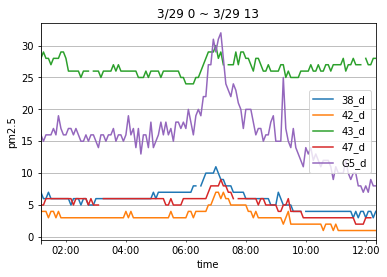

In [20]:
df = df.astype(float)
df.plot()
plt.title('3/29 0 ~ 3/29 13')
plt.grid(True)
plt.xlabel("time") 
plt.ylabel("pm2.5")
# plt.savefig('five device report')
plt.show()

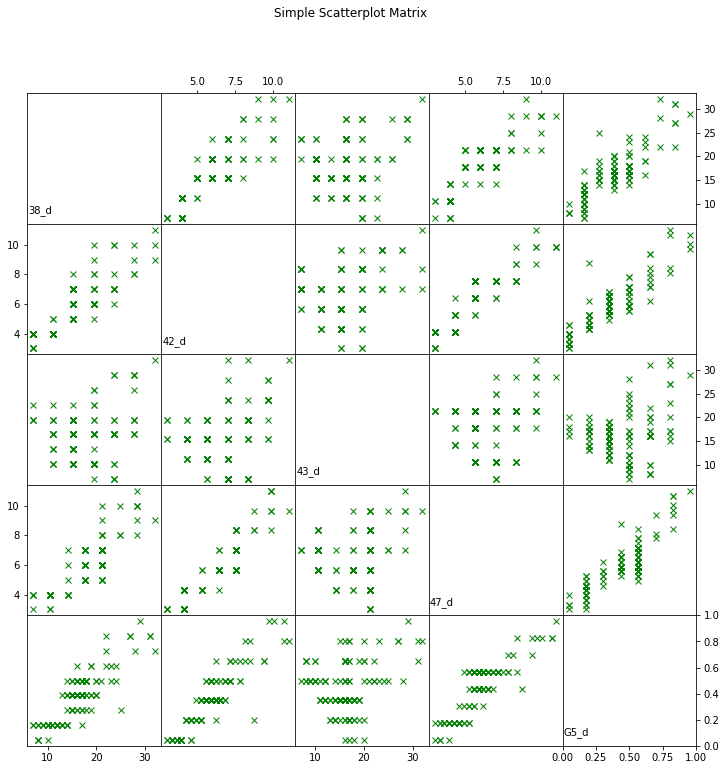

In [21]:
SUM_data = []
SUM_data.append(list(df["38_d"]))
SUM_data.append(list(df["42_d"]))
SUM_data.append(list(df["43_d"]))
SUM_data.append(list(df["47_d"]))
SUM_data.append(list(df["G5_d"]))
SUM_data = np.array(SUM_data) 
fig = scatterplot_matrix(SUM_data, ['38_d', '42_d', '43_d', '47_d', 'G5_d'], linestyle='none', marker='x', color='green', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.savefig('scatter_plot_matrix')
plt.show()

In [22]:
total_std = []
average = []
for x in range(0, 135):
    row = np.array(df.iloc[x])
    std = row.std()
    avg = row.mean()
    total_std.append(std)
    average.append(avg)
total_std = np.array(total_std)
average = np.array(average)
CV = total_std / average

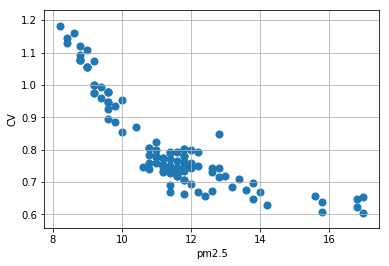

In [23]:
df_CV = pd.DataFrame({"CV": CV}, index = average)
plt.scatter(average, CV, marker = "o", s = 50)
plt.grid(True)
plt.xlabel("pm2.5") 
plt.ylabel("CV") 
# plt.savefig('CV of sensor')
plt.show()

r: 0.850183889821


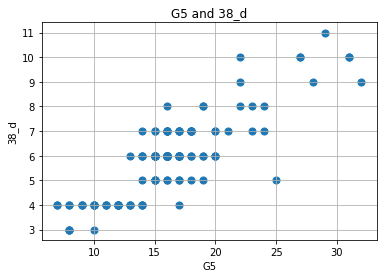

In [24]:
data_38 = df["38_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"38_d":data_38, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_38, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 38_d")
plt.xlabel("G5") 
plt.ylabel("38_d")
# plt.savefig('G5 and 38_d')
plt.show()

r: 0.890521366192


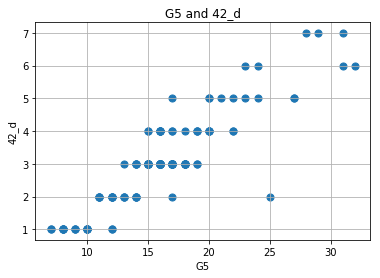

In [25]:
data_42 = df["42_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"42_d":data_42, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_42, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 42_d")
plt.xlabel("G5") 
plt.ylabel("42_d")
# plt.savefig('G5 and 42_d')
plt.show()

r: 0.243030761699


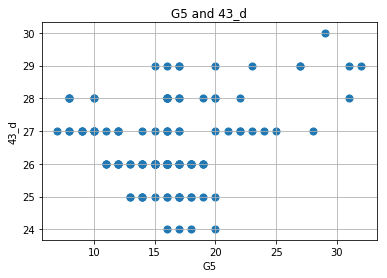

In [26]:
data_43 = df["43_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"43_d":data_43, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_43, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 43_d")
plt.xlabel("G5") 
plt.ylabel("43_d")
# plt.savefig('G5 and 43_d')
plt.show()

r: 0.833501689204


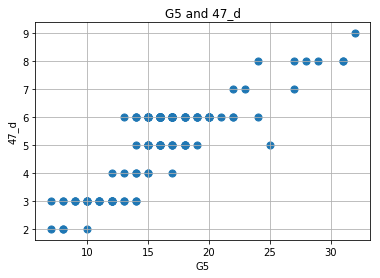

In [27]:
data_47 = df["47_d"]
G5 = df["G5_d"]
df_total = pd.DataFrame({"47_d":data_47, "G5_d":G5})
corr_coef = df_total.corr()
r = np.array(corr_coef)
print("r:", r[0][1])
plt.scatter(G5, data_47, marker = "o", s = 50)
plt.grid(True)
plt.title("G5 and 47_d")
plt.xlabel("G5") 
plt.ylabel("47_d") 
# plt.savefig('G5 and 47_d')
plt.show()

In [28]:
df_MIT = pd.concat([df1, df2, df4], axis = 1) 
df_MIT = df_MIT.interpolate()
# print(df_MIT)
df_G5 = df5["G5_d"].interpolate()
# print(df_G5)
G5_list = list(df_G5)
average = []
for x in range(0, 135):
    row = np.array(df_MIT.iloc[x])
    avg = row.mean()
    # avg = avg.astype(np.int)
    average.append(avg)

In [29]:
from sklearn.linear_model import LinearRegression

MIT_data = np.array(average)
G5_data = np.array(G5_list)

lm = LinearRegression()
lm.fit(np.reshape(MIT_data, (len(MIT_data), 1)), np.reshape(G5_data, (len(G5_data), 1)))

print(lm.coef_)
print(lm.intercept_)

[[ 3.08768669]]
[ 1.61271591]


In [30]:
to_be_predicted = np.array([6, 7, 8, 7.5])
predicted_pmdata = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))
print(predicted_pmdata)

[[ 20.13883608]
 [ 23.22652277]
 [ 26.31420947]
 [ 24.77036612]]


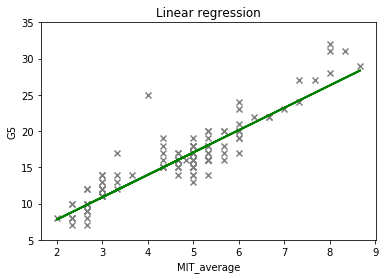

In [31]:
plt.scatter(MIT_data, G5_data, color='grey', marker = 'x')
plt.plot(MIT_data, lm.predict(np.reshape(MIT_data, (len(MIT_data), 1))), color='green', linewidth=2)
# plt.plot(to_be_predicted, predicted_pmdata, color = 'blue', marker = '*', markersize = 10)
plt.xticks((np.arange(2, 10, step=1)))
plt.yticks((np.arange(5, 40, step=5)))
plt.xlabel("MIT_average") 
plt.ylabel("G5") 
plt.title("Linear regression")
# plt.savefig('linear regression_2')
plt.show()

In [32]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(MIT_data, G5_data)

In [33]:
print(slope)
print(intercept)
print(r_value)
R_square = r_value**2
print(R_square)
print(p_value)
print(std_err)

3.08768669437
1.61271591059
0.903588799678
0.816472718903
8.29084554187e-51
0.126936606021
